## Jasmin Cooper

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [2]:
#load datasets
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")

In [3]:
dataset_train.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,...,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,...,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33
2,277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,F,NaN,...,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157
3,320055,Hispanic,MEDICAID,CA,900,West,Pacific,59,F,NaN,...,63.34,63.10,67.45,75.86,75.24,71.10,68.95,65.46,59.46,146
4,190386,NaN,COMMERCIAL,CA,934,West,Pacific,71,F,NaN,...,59.45,60.24,64.77,69.81,70.13,68.10,65.38,60.72,54.08,286


In [4]:
dataset_test.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.00,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
2,571362,NaN,COMMERCIAL,TX,794,South,West South Central,54,F,32.33,...,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13
3,907331,NaN,COMMERCIAL,TN,373,South,East South Central,63,F,27.07,...,47.57,53.50,71.31,75.20,76.96,75.78,74.87,61.06,44.31,42.83
4,208382,Asian,NaN,WA,980,West,Pacific,62,F,NaN,...,41.02,46.25,56.92,57.88,66.16,65.21,57.52,49.53,43.75,38.33


# Exploratory Data Analysis

## Visualizing missing/NA values

In [5]:
#79 columns present not related to temperature. Any temperature values that are missing/NA will be handled through summing and averaging the years later.
print("\nCount of Missing Values Per Column:")
selected_columns = dataset_train.iloc[:, 1:20]
print(selected_columns.isna().sum())
selected_columns = dataset_train.iloc[:, 21:40]
print(selected_columns.isna().sum())
selected_columns = dataset_train.iloc[:, 41:60]
print(selected_columns.isna().sum())
selected_columns = dataset_train.iloc[:, 61:79]
print(selected_columns.isna().sum())


Count of Missing Values Per Column:
patient_race                              6657
payer_type                                1765
patient_state                                0
patient_zip3                                 0
Region                                       0
Division                                     0
patient_age                                  0
patient_gender                               0
bmi                                       9071
breast_cancer_diagnosis_code                 0
breast_cancer_diagnosis_desc                 0
metastatic_cancer_diagnosis_code             0
metastatic_first_novel_treatment         13162
metastatic_first_novel_treatment_type    13162
population                                   0
density                                      0
age_median                                   0
age_under_10                                 0
age_10_to_19                                 0
dtype: int64
age_30s                      0
age_40s                   

## Visualizing categorical variables

<Axes: ylabel='Percent'>

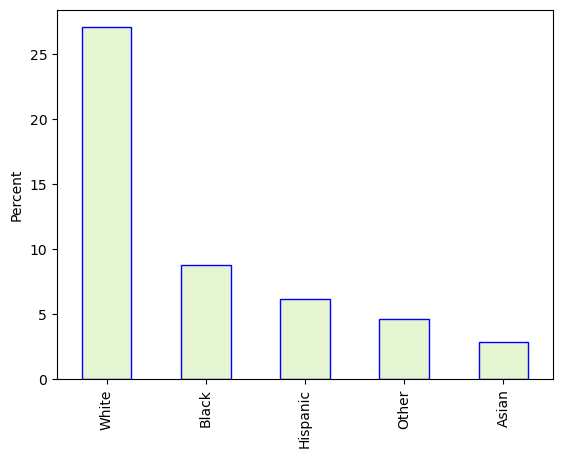

In [6]:
#patient_race bar chart
myPerc = (dataset_train['patient_race'].value_counts())/len(dataset_train['patient_race'])*100
plt.xticks(rotation=45)
plt.ylabel('Percent')
myPerc.plot(kind='bar', color=(0.5,0.8,0.1,0.2), edgecolor='blue')

In [7]:
myPerc

White       27.062932
Black        8.798300
Hispanic     6.126167
Other        4.645867
Asian        2.831549
Name: patient_race, dtype: float64

Drop patient race because of missing values and the other race columns that are present in the dataset.

<Axes: ylabel='Percent'>

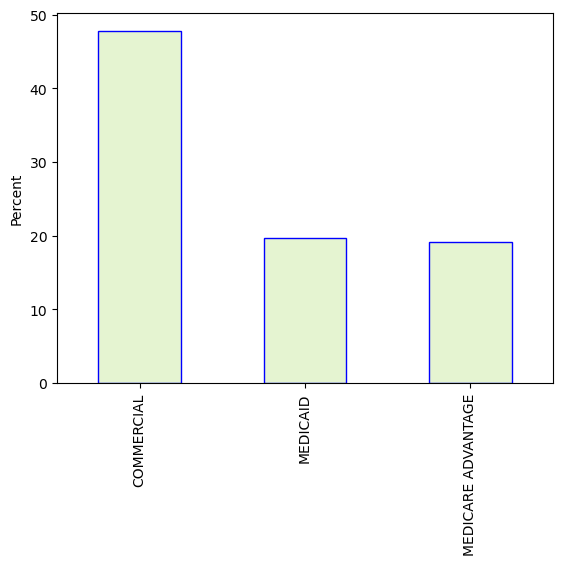

In [8]:
#payer_type bar chart
myPerc = (dataset_train['payer_type'].value_counts())/len(dataset_train['payer_type'])*100
plt.xticks(rotation=45)
plt.ylabel('Percent')
myPerc.plot(kind='bar', color=(0.5,0.8,0.1,0.2), edgecolor='blue')

In [9]:
myPerc

COMMERCIAL            47.802323
MEDICAID              19.684203
MEDICARE ADVANTAGE    19.114856
Name: payer_type, dtype: float64

Keep payer type, but need to handle the missing values later.

<Axes: ylabel='Percent'>

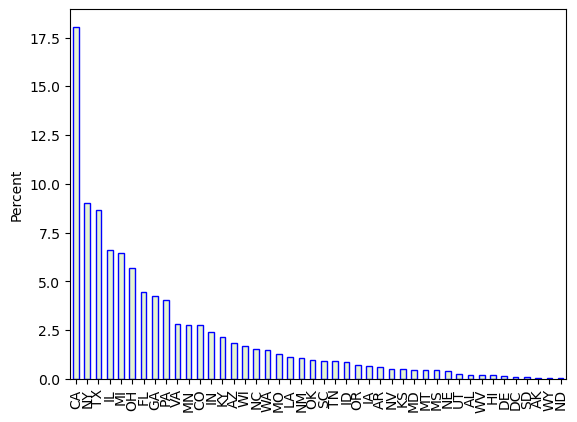

In [10]:
#patient_state bar chart
myPerc = (dataset_train['patient_state'].value_counts())/len(dataset_train['patient_state'])*100
plt.xticks(rotation=45)
plt.ylabel('Percent')
myPerc.plot(kind='bar', color=(0.5,0.8,0.1,0.2), edgecolor='blue')

In [11]:
myPerc

CA    18.044485
NY     9.026038
TX     8.646474
IL     6.612009
MI     6.482958
OH     5.693464
FL     4.456084
GA     4.266302
PA     4.038564
VA     2.808776
MN     2.778410
CO     2.763228
IN     2.391255
KY     2.140742
AZ     1.844682
WI     1.670083
NC     1.533440
WA     1.495483
MO     1.267745
LA     1.123510
NM     1.055189
OK     0.986867
SC     0.903363
TN     0.903363
ID     0.857815
OR     0.705990
IA     0.668033
AR     0.614894
NV     0.531390
KS     0.493434
MD     0.485842
MT     0.478251
MS     0.478251
NE     0.394747
UT     0.235330
AL     0.227739
WV     0.227739
HI     0.182191
DE     0.144234
DC     0.113869
SD     0.106278
AK     0.053139
WY     0.037956
ND     0.030365
Name: patient_state, dtype: float64

Keep patient state. The top state is California at 18% , followed by New York at 9%, Texas at 8%, and Illinois and Michigan at 6% respectively. The lowest state is North Dakota at 0.03%.

<Axes: ylabel='Percent'>

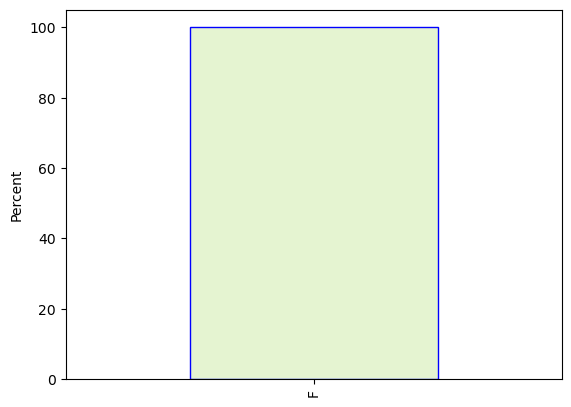

In [12]:
#patient_gender bar chart
myPerc = (dataset_train['patient_gender'].value_counts())/len(dataset_train['patient_gender'])*100
plt.xticks(rotation=45)
plt.ylabel('Percent')
myPerc.plot(kind='bar', color=(0.5,0.8,0.1,0.2), edgecolor='blue')

In [13]:
myPerc

F    100.0
Name: patient_gender, dtype: float64

Drop patient gender. All patients are female, so it is constant and does not provide variation to the dataset.

<Axes: ylabel='Percent'>

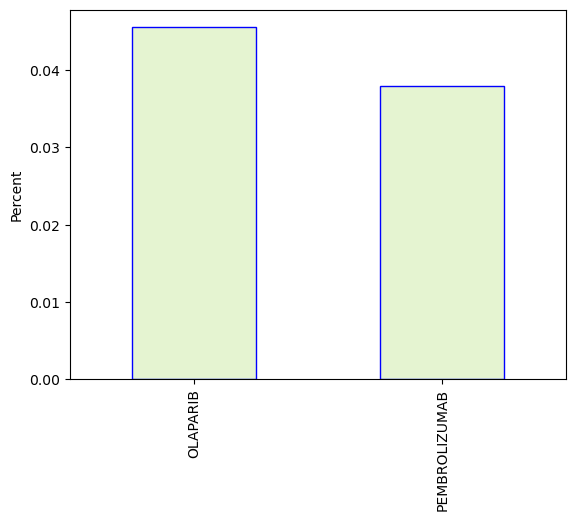

In [14]:
#metastatic_first_novel_treatment bar chart
myPerc = (dataset_train['metastatic_first_novel_treatment'].value_counts())/len(dataset_train['metastatic_first_novel_treatment'])*100
plt.xticks(rotation=45)
plt.ylabel('Percent')
myPerc.plot(kind='bar', color=(0.5,0.8,0.1,0.2), edgecolor='blue')

In [15]:
myPerc

OLAPARIB         0.045548
PEMBROLIZUMAB    0.037956
Name: metastatic_first_novel_treatment, dtype: float64

Drop metastatic_first_novel_treatment due to the high number of NAs.

<Axes: ylabel='Percent'>

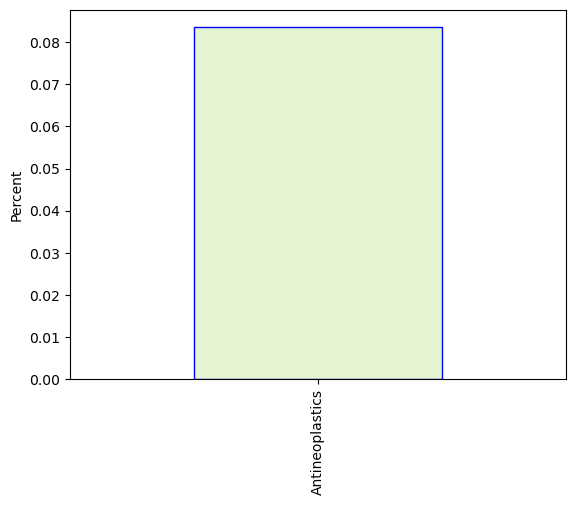

In [16]:
#metastatic_first_novel_treatment_type bar chart
myPerc = (dataset_train['metastatic_first_novel_treatment_type'].value_counts())/len(dataset_train['metastatic_first_novel_treatment_type'])*100
plt.xticks(rotation=45)
plt.ylabel('Percent')
myPerc.plot(kind='bar', color=(0.5,0.8,0.1,0.2), edgecolor='blue')

In [17]:
myPerc

Antineoplastics    0.083504
Name: metastatic_first_novel_treatment_type, dtype: float64

Drop metastatic_first_novel_treatment_type due to high number of NAs and because it is constant in the few values that there are.

<Axes: ylabel='Percent'>

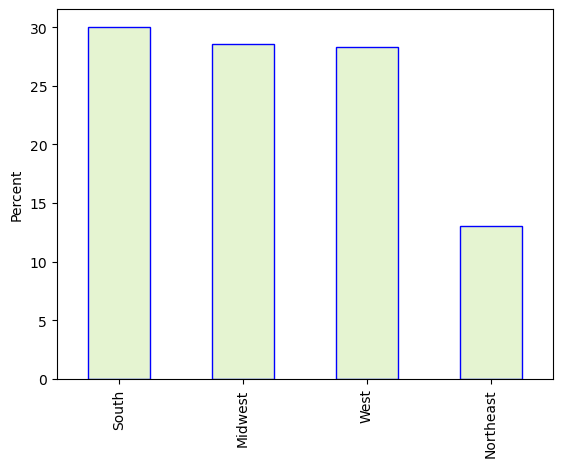

In [18]:
#Region bar chart
myPerc = (dataset_train['Region'].value_counts())/len(dataset_train['Region'])*100
plt.xticks(rotation=45)
plt.ylabel('Percent')
myPerc.plot(kind='bar', color=(0.5,0.8,0.1,0.2), edgecolor='blue')

In [19]:
myPerc

South        30.061489
Midwest      28.588780
West         28.285129
Northeast    13.064602
Name: Region, dtype: float64

Keep Region. Pretty evenly spread other than the Northeast which is the lowest by roughly 15%.

<Axes: ylabel='Percent'>

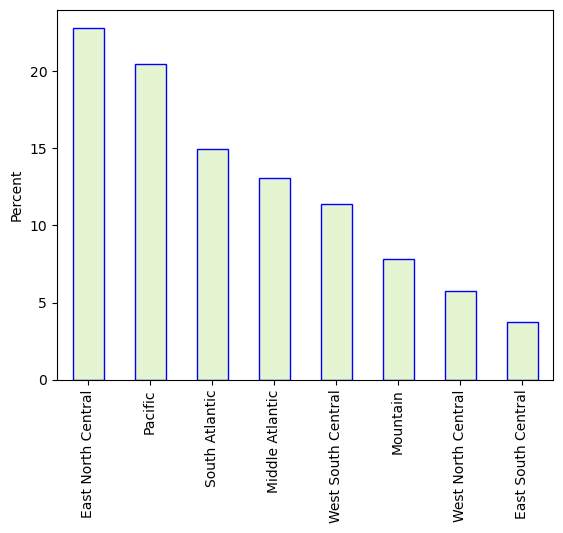

In [20]:
#Division bar chart
myPerc = (dataset_train['Division'].value_counts())/len(dataset_train['Division'])*100
plt.xticks(rotation=45)
plt.ylabel('Percent')
myPerc.plot(kind='bar', color=(0.5,0.8,0.1,0.2), edgecolor='blue')

In [21]:
myPerc

East North Central    22.849768
Pacific               20.473696
South Atlantic        14.939649
Middle Atlantic       13.064602
West South Central    11.371745
Mountain               7.811432
West North Central     5.739012
East South Central     3.750095
Name: Division, dtype: float64

Keep Division. The most patients are in the East North Central division and the least patients are in the East South Central region.

## Visualizing continuous variables

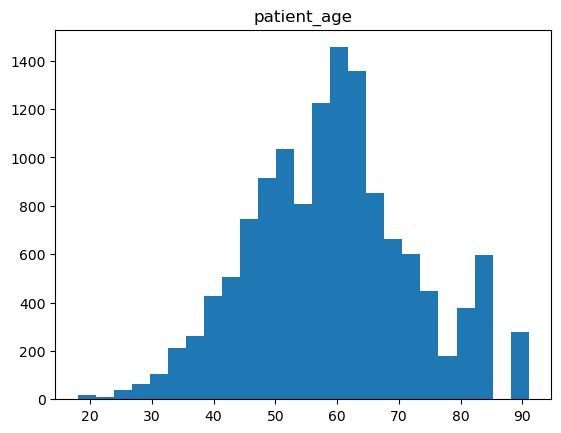

In [22]:
#patient_age histogram
ax = dataset_train.hist(column='patient_age', bins=25, grid=False)

Keep patient age. Most patients range from 50-70 years old. 

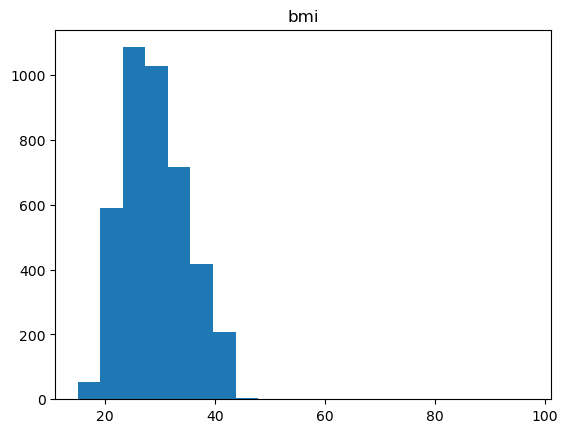

In [23]:
#bmi histogram
ax = dataset_train.hist(column='bmi', bins=20, grid=False)

In relation to this particular dataset, bmi will require more research. There are many missing values, but we want to avoid bias. So, more than likely, it will be kept as is even with the missing values.

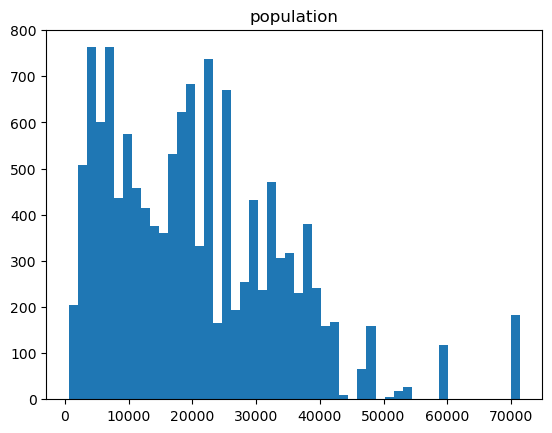

In [24]:
#population histogram
ax = dataset_train.hist(column='population', bins=50, grid=False)

Keep population. Most populations are 40000 or less.

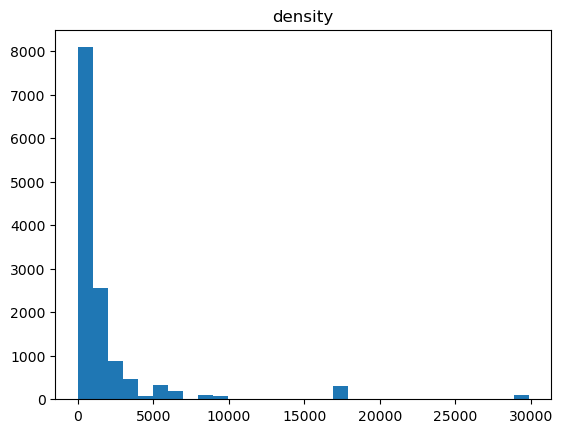

In [25]:
#density (The estimated population per square kilometer) histogram
ax = dataset_train.hist(column='density', bins=30, grid=False)

Keep density. Most patients are not in areas too dense per square kilometer.

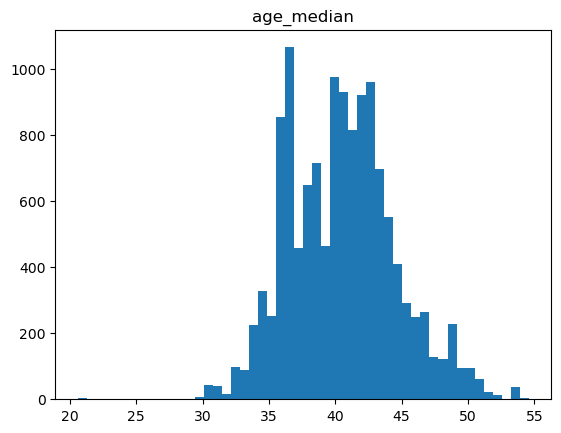

In [26]:
#age_median histogram
ax = dataset_train.hist(column='age_median', bins=50, grid=False)

Keep age median. The age median is normally distributed around 35-45 years old.

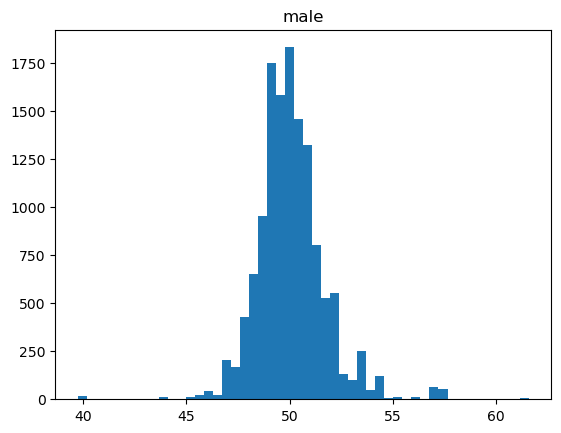

In [27]:
#male histogram
ax = dataset_train.hist(column='male', bins=50, grid=False)

Keep male. Normally distributed around 50 percent.

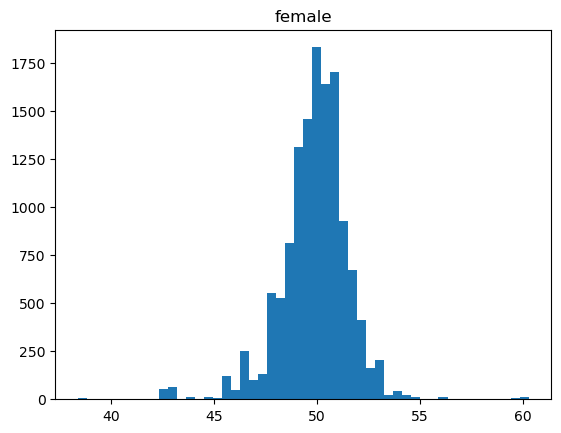

In [28]:
#female histogram
ax = dataset_train.hist(column='female', bins=50, grid=False)

Keep female. Normally distributed around 50 percent.

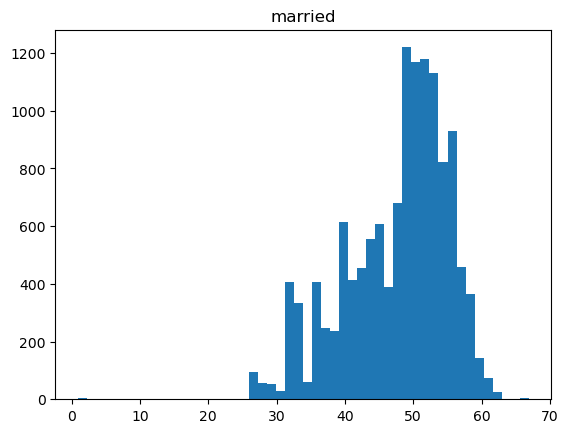

In [29]:
#married histogram
ax = dataset_train.hist(column='married', bins=50, grid=False)

Keep married. Most individuals are in areas that have roughly 50%-60% married residents.

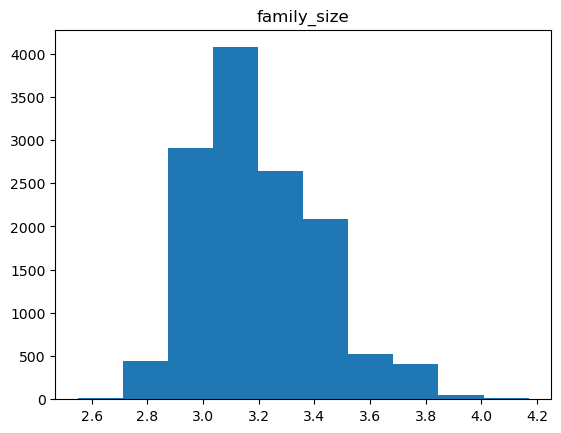

In [30]:
#family_size histogram
ax = dataset_train.hist(column='family_size', bins=10, grid=False)

Keep family size. Most individuals are in areas that have an average family size of around 3 individuals.

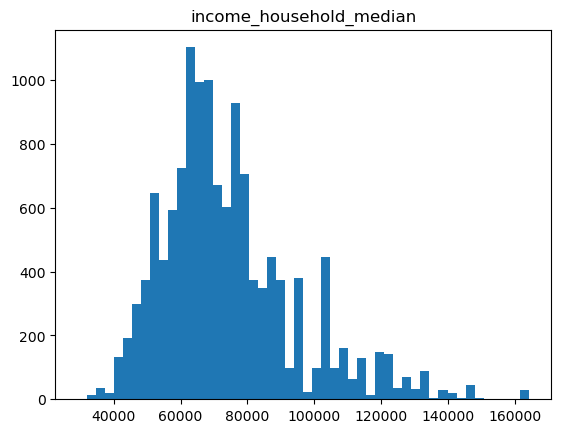

In [31]:
#income_household_median histogram
ax = dataset_train.hist(column='income_household_median', bins=50, grid=False)

Keep income_household_median. Most individuals are in areas that have a household income median of $60000.

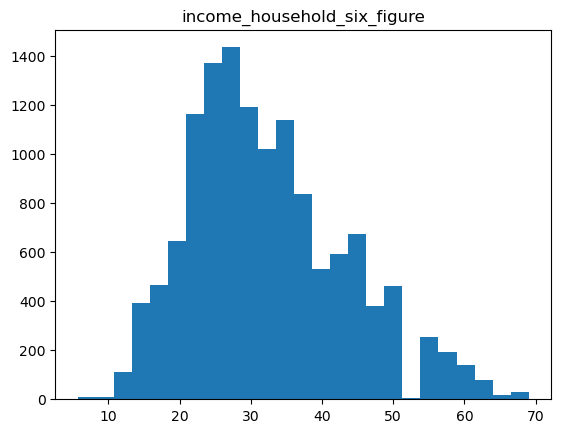

In [32]:
#income_household_six_figure histogram
ax = dataset_train.hist(column='income_household_six_figure', bins=25, grid=False)

Keep income_household_six_figure. Most individuals are in areas that have about 30% of households making six figures, with a few individuals being in areas where it is 60% and above.

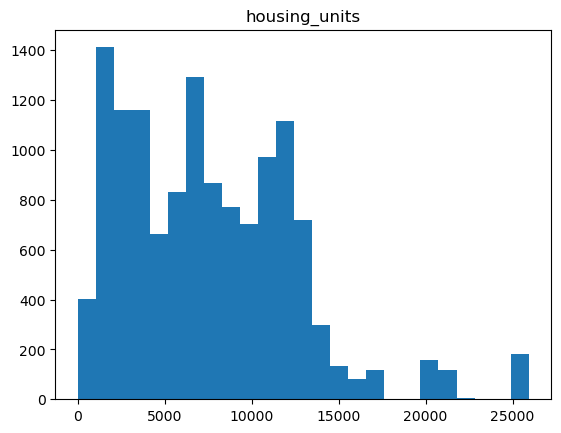

In [33]:
#housing_units(the number of housing units (or households) in the zip code) histogram
ax = dataset_train.hist(column='housing_units', bins=25, grid=False)

Keep housing_units. Most individuals are in areas that have 15000 or less housing units per zip code.

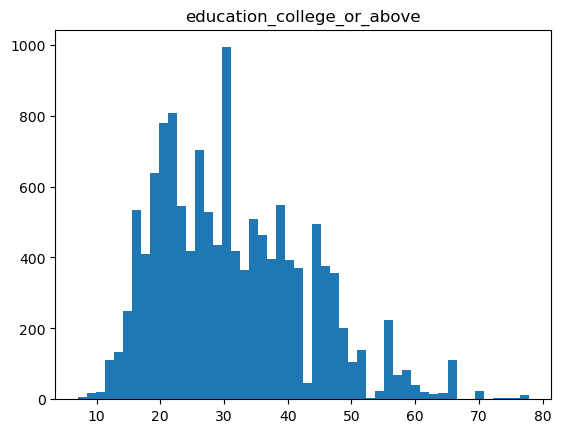

In [34]:
#education_college_or_above histogram
ax = dataset_train.hist(column='education_college_or_above', bins=50, grid=False)

Keep education_college_or_above. 30% is the most common percentage for college education or above.

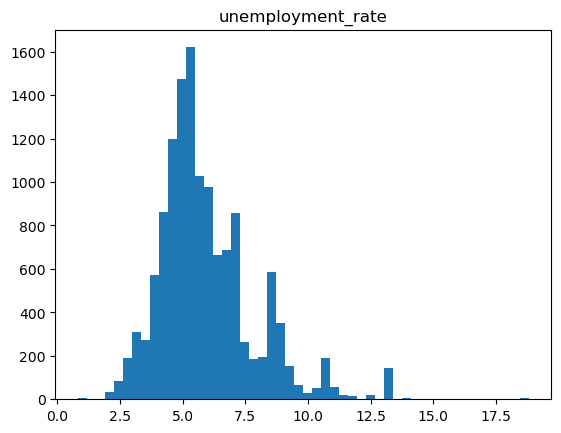

In [35]:
#unemployment_rate histogram
ax = dataset_train.hist(column='unemployment_rate', bins=50, grid=False)

Keep unemployment_rate. The unemployment rate for most individuals is 5%, with a few individuals in areas where it is around 12.5% and above.

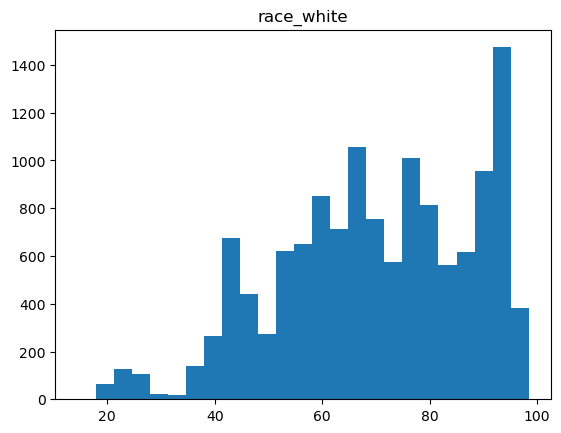

In [36]:
#race_white histogram
ax = dataset_train.hist(column='race_white', bins=25, grid=False)

Keep all races/ethnicities (this and the next seven histograms). Most individuals live in areas that have a fairly high White population (60% and above).

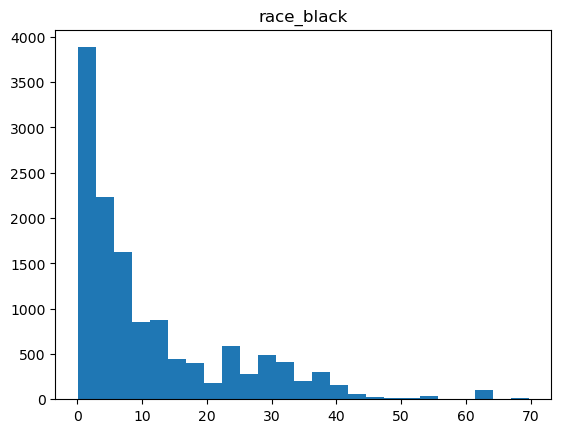

In [37]:
#race_black histogram
ax = dataset_train.hist(column='race_black', bins=25, grid=False)

Most individuals live in areas that have a somewhat low Black population (20% or less), with a few higher areas (around 50%-70%).

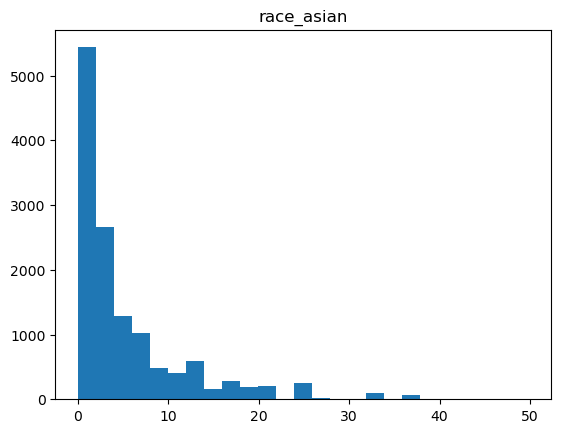

In [38]:
#race_asian histogram
ax = dataset_train.hist(column='race_asian', bins=25, grid=False)

Most individuals live in areas that have a fairly low Asian population (25% or less).

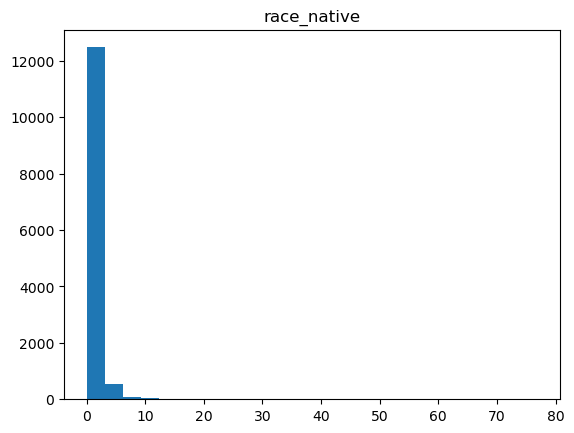

In [39]:
#race_native histogram
ax = dataset_train.hist(column='race_native', bins=25, grid=False)

Most individuals live in areas that have a low Native population (5% or less).

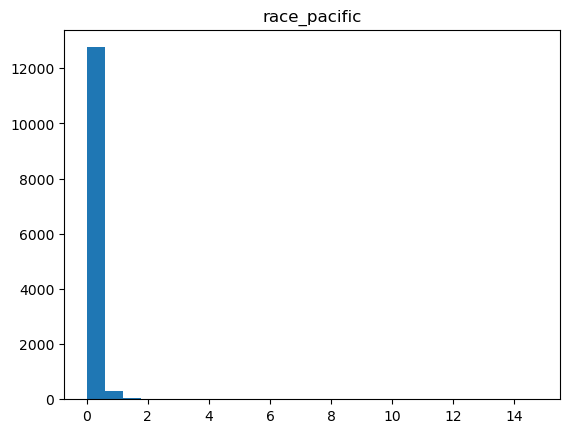

In [40]:
#race_pacific histogram
ax = dataset_train.hist(column='race_pacific', bins=25, grid=False)

Most individuals live in areas that have a very low Pacific population (less than 1%).

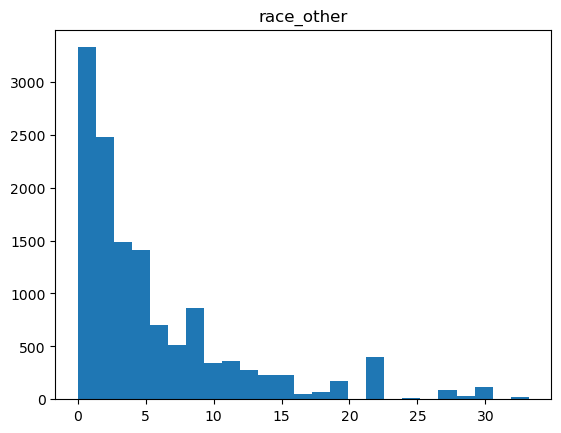

In [41]:
#race_other histogram
ax = dataset_train.hist(column='race_other', bins=25, grid=False)

The spread of other races is fairly even, ranging from 0% to 30%.

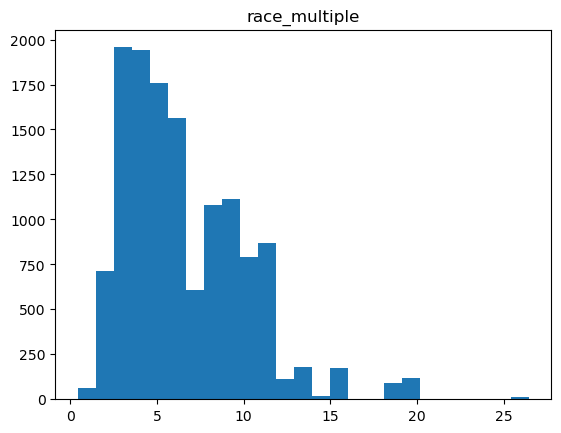

In [42]:
#race_multiple histogram
ax = dataset_train.hist(column='race_multiple', bins=25, grid=False)

Most individuals live in areas that have a multiple race population ranging from 0.5% to 15%, with a few that are around 20%.

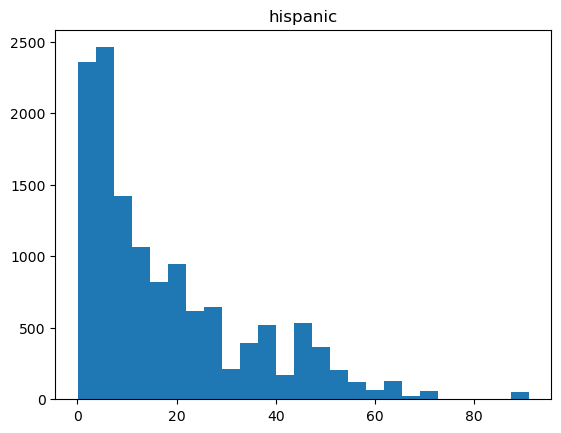

In [43]:
#hispanic histogram
ax = dataset_train.hist(column='hispanic', bins=25, grid=False)

The spread of Hispanic ethnicity is fairly even, ranging from 0% to 60%, with a few values 70% and above.

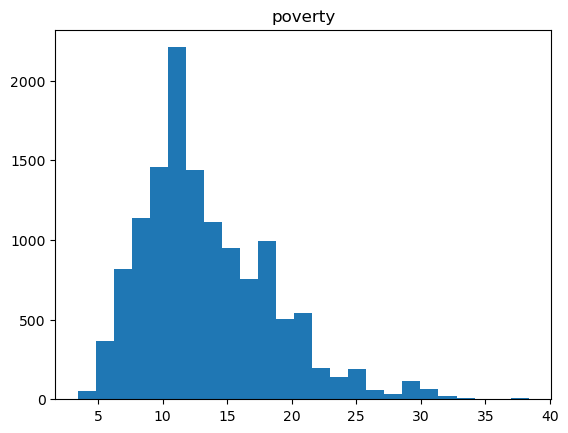

In [44]:
#poverty histogram
ax = dataset_train.hist(column='poverty', bins=25, grid=False)

Keep poverty. Most individuals are in areas that have a poverty rate of around 10%. (As a note, poverty has a very small amount of missing values: 5, which is 0.03795642602% of the rows)

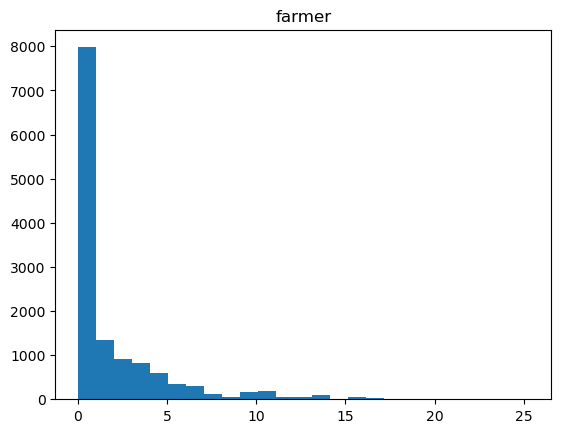

In [45]:
#farmer (the percentage of households reporting farm income on their 2016 IRS tax return) histogram
ax = dataset_train.hist(column='farmer', bins=25, grid=False)

Drop farmer. Most individuals are in areas that have 0% of farmers reporting.

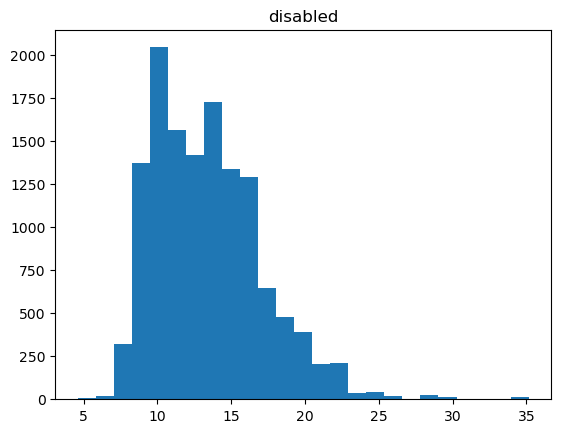

In [46]:
#disabled histogram
ax = dataset_train.hist(column='disabled', bins=25, grid=False)

Keep disabled. Most individuals are in areas that have a disabled percentage ranging from 10% to 20%.

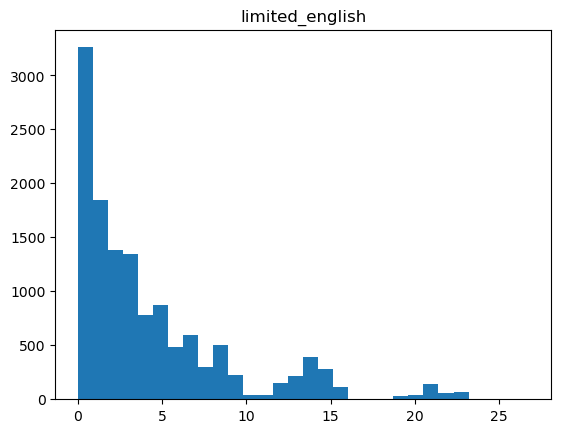

In [47]:
#limited_english histogram
ax = dataset_train.hist(column='limited_english', bins=30, grid=False)

Keep limited_english. Most individuals live in areas where there is 0% to 10% of speakers of limited English. (As a note, limited_english has a very small amount of missing values: 5, which is 0.03795642602% of the rows)

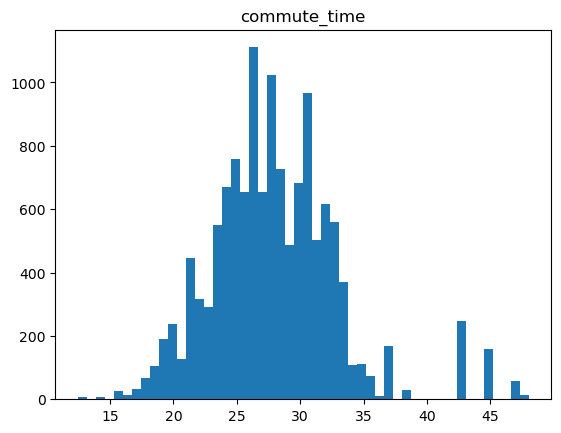

In [48]:
#commute_time histogram
ax = dataset_train.hist(column='commute_time', bins=50, grid=False)

Drop commute time. This is not relevant to the analysis being performed.

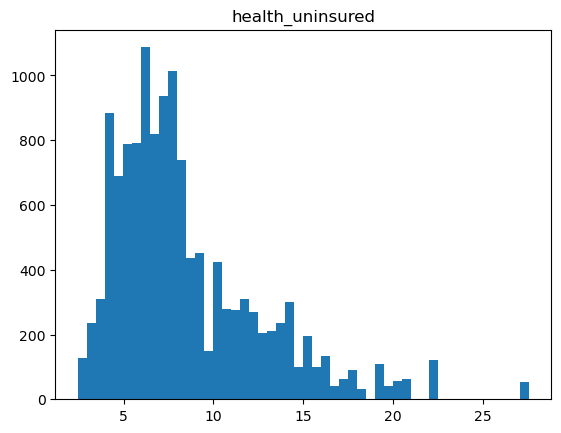

In [49]:
#health_uninsured histogram
ax = dataset_train.hist(column='health_uninsured', bins=50, grid=False)

Keep health_uninsured. Most individuals live in areas where there is 5% to 15% of people without health insurance.

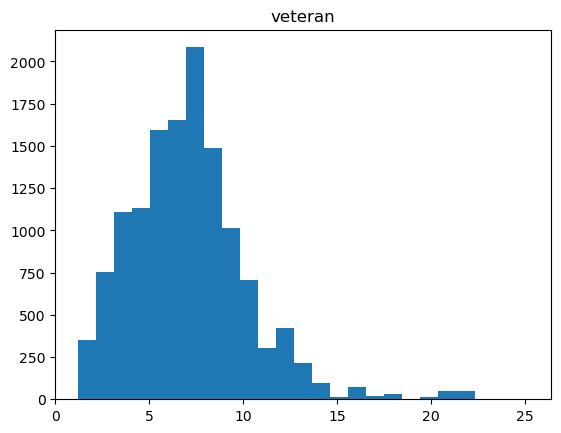

In [50]:
#veteran histogram
ax = dataset_train.hist(column='veteran', bins=25, grid=False)

Keep veteran. Most individuals live in areas where there is 5% to 15% of individuals identifying as veterans. 

All individual temperature average columns will be dropped, but a function will be defined to keep each average temperature column for “*insert month* 13-18.” This means that the new columns will provide the average temperature of each month for the years 2013 through 2018. 

## Creating monthly average temperature across the years 2013-2018 columns

In [51]:
#creating Average of January 2013-2018 column
def my_function(sumofyears,average13,average14,average15,average16,average17,average18):
    dataset_train[sumofyears] = dataset_train[average13] + dataset_train[average14] + dataset_train[average15]+dataset_train[average16]+dataset_train[average17]+ dataset_train[average18]    

In [52]:
my_function('Sum of Jan 13-18', 'Average of Jan-13','Average of Jan-14', 'Average of Jan-15','Average of Jan-16','Average of Jan-17','Average of Jan-18')

In [53]:
dataset_train['Average of Jan 13-18'] = dataset_train['Sum of Jan 13-18']/6
dataset_train['Average of Jan 13-18']

0        35.753333
1        32.316667
2        56.740000
3        60.495000
4        54.673333
           ...    
13168    31.093333
13169    47.565000
13170    60.535000
13171    22.946667
13172    60.495000
Name: Average of Jan 13-18, Length: 13173, dtype: float64

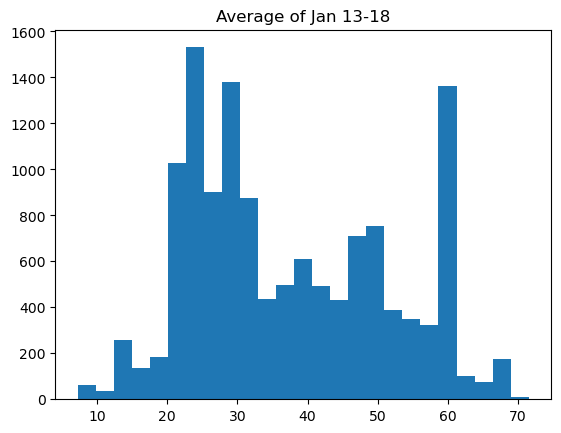

In [54]:
#Average of Jan 13-18 histogram
ax = dataset_train.hist(column='Average of Jan 13-18', bins=25, grid=False)

In [55]:
#creating Average of February 2013-2018 column
my_function('Sum of Feb 13-18', 'Average of Feb-13','Average of Feb-14', 'Average of Feb-15','Average of Feb-16','Average of Feb-17','Average of Feb-18')

In [56]:
dataset_train['Average of Feb 13-18'] = dataset_train['Sum of Feb 13-18']/6
dataset_train['Average of Feb 13-18']

0        39.733333
1        35.783333
2        59.728333
3        61.091667
4        55.655000
           ...    
13168    35.618333
13169    52.756667
13170    61.741667
13171    24.606667
13172    61.091667
Name: Average of Feb 13-18, Length: 13173, dtype: float64

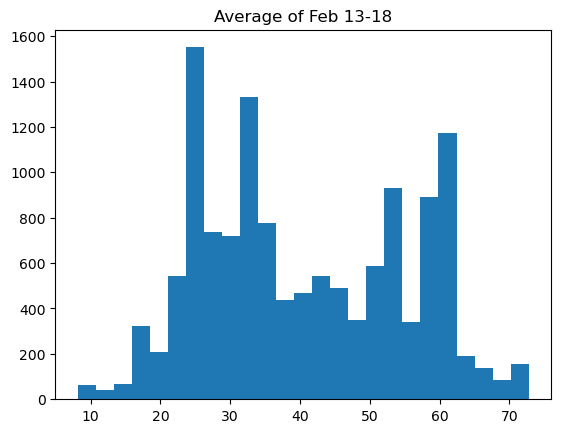

In [57]:
#Average of Feb 13-18 histogram
ax = dataset_train.hist(column='Average of Feb 13-18', bins=25, grid=False)

In [58]:
#creating Average of March 2013-2018 column
my_function('Sum of Mar 13-18', 'Average of Mar-13','Average of Mar-14', 'Average of Mar-15','Average of Mar-16','Average of Mar-17','Average of Mar-18')

In [59]:
dataset_train['Average of Mar 13-18'] = dataset_train['Sum of Mar 13-18']/6
dataset_train['Average of Mar 13-18']

0        47.718333
1        44.593333
2        64.610000
3        62.778333
4        59.058333
           ...    
13168    39.665000
13169    59.360000
13170    64.325000
13171    32.763333
13172    62.778333
Name: Average of Mar 13-18, Length: 13173, dtype: float64

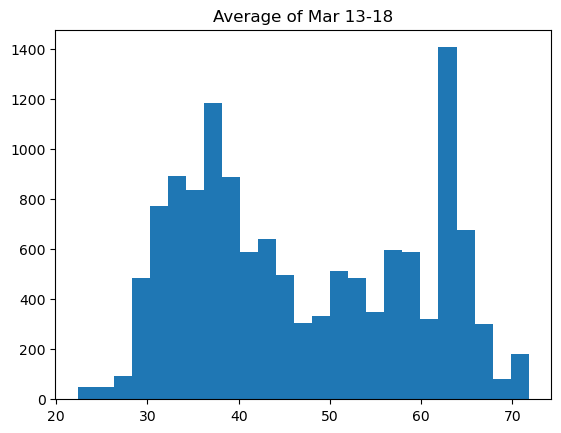

In [60]:
#Average of Mar 13-18 histogram
ax = dataset_train.hist(column='Average of Mar 13-18', bins=25, grid=False)

In [61]:
#creating Average of April 2013-2018 column
my_function('Sum of Apr 13-18', 'Average of Apr-13','Average of Apr-14', 'Average of Apr-15','Average of Apr-16','Average of Apr-17','Average of Apr-18')

In [62]:
dataset_train['Average of Apr 13-18'] = dataset_train['Sum of Apr 13-18']/6
dataset_train['Average of Apr 13-18']

0        58.473333
1        56.410000
2        67.873333
3        64.126667
4        60.433333
           ...    
13168    52.675000
13169    65.900000
13170    66.365000
13171    45.726667
13172    64.126667
Name: Average of Apr 13-18, Length: 13173, dtype: float64

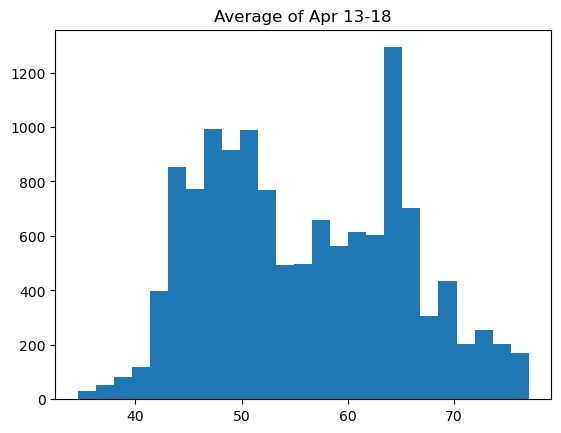

In [63]:
#Average of Apr 13-18 histogram
ax = dataset_train.hist(column='Average of Apr 13-18', bins=25, grid=False)

In [64]:
#creating Average of May 2013-2018 column
my_function('Sum of May 13-18', 'Average of May-13','Average of May-14', 'Average of May-15','Average of May-16','Average of May-17','Average of May-18')

In [65]:
dataset_train['Average of May 13-18'] = dataset_train['Sum of May 13-18']/6
dataset_train['Average of May 13-18']

0        68.196667
1        66.986667
2        71.105000
3        64.831667
4        61.728333
           ...    
13168    63.280000
13169    73.145000
13170    68.076667
13171    60.001667
13172    64.831667
Name: Average of May 13-18, Length: 13173, dtype: float64

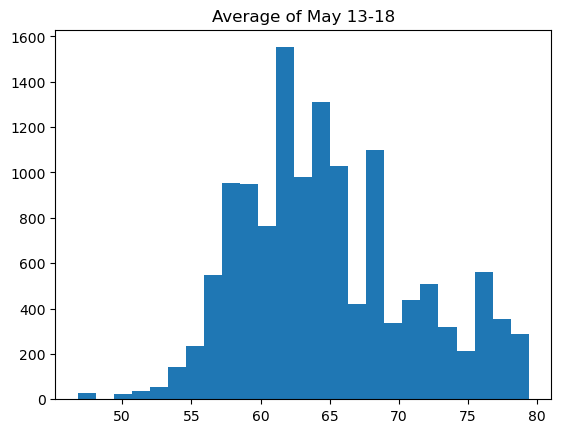

In [66]:
#Average of May 13-18 histogram
ax = dataset_train.hist(column='Average of May 13-18', bins=25, grid=False)

In [67]:
#creating Average of June 2013-2018 column
my_function('Sum of Jun 13-18', 'Average of Jun-13','Average of Jun-14', 'Average of Jun-15','Average of Jun-16','Average of Jun-17','Average of Jun-18')

In [68]:
dataset_train['Average of Jun 13-18'] = dataset_train['Sum of Jun 13-18']/6
dataset_train['Average of Jun 13-18']

0        78.018333
1        75.738333
2        80.021667
3        68.896667
4        66.588333
           ...    
13168    71.438333
13169    81.138333
13170    72.676667
13171    68.035000
13172    68.896667
Name: Average of Jun 13-18, Length: 13173, dtype: float64

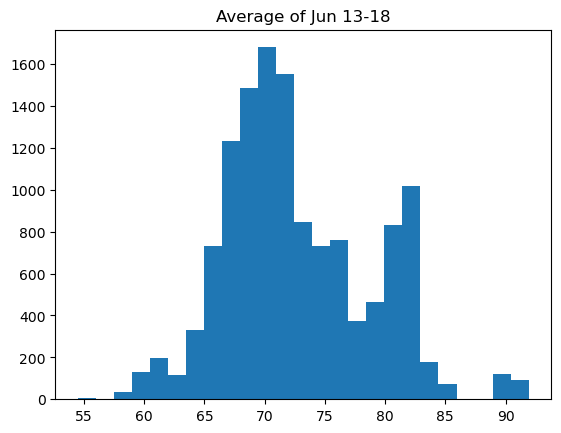

In [69]:
#Average of Jun 13-18 histogram
ax = dataset_train.hist(column='Average of Jun 13-18', bins=25, grid=False)

In [70]:
#creating Average of July 2013-2018 column
my_function('Sum of Jul 13-18', 'Average of Jul-13','Average of Jul-14', 'Average of Jul-15','Average of Jul-16','Average of Jul-17','Average of Jul-18')

In [71]:
dataset_train['Average of Jul 13-18'] = dataset_train['Sum of Jul 13-18']/6
dataset_train['Average of Jul 13-18']

0        79.361667
1        76.831667
2        84.558333
3        73.175000
4        69.238333
           ...    
13168    76.933333
13169    83.733333
13170    77.500000
13171    71.306667
13172    73.175000
Name: Average of Jul 13-18, Length: 13173, dtype: float64

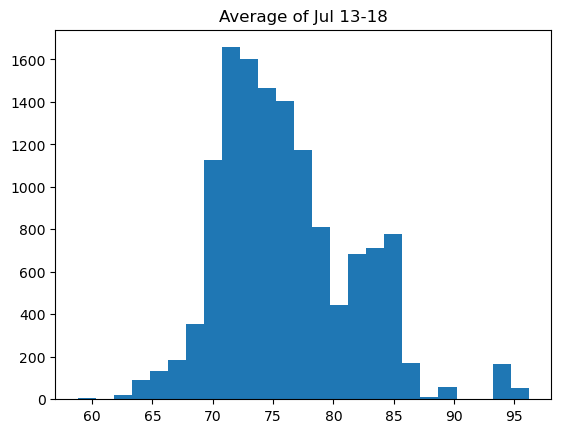

In [72]:
#Average of Jul 13-18 histogram
ax = dataset_train.hist(column='Average of Jul 13-18', bins=25, grid=False)

In [73]:
#creating Average of August 2013-2018 column
my_function('Sum of Aug 13-18', 'Average of Aug-13','Average of Aug-14', 'Average of Aug-15','Average of Aug-16','Average of Aug-17','Average of Aug-18')

In [74]:
dataset_train['Average of Aug 13-18'] = dataset_train['Sum of Aug 13-18']/6
dataset_train['Average of Aug 13-18']

0        77.716667
1        75.436667
2        84.170000
3        73.851667
4        68.895000
           ...    
13168    74.638333
13169    83.181667
13170    77.871667
13171    70.256667
13172    73.851667
Name: Average of Aug 13-18, Length: 13173, dtype: float64

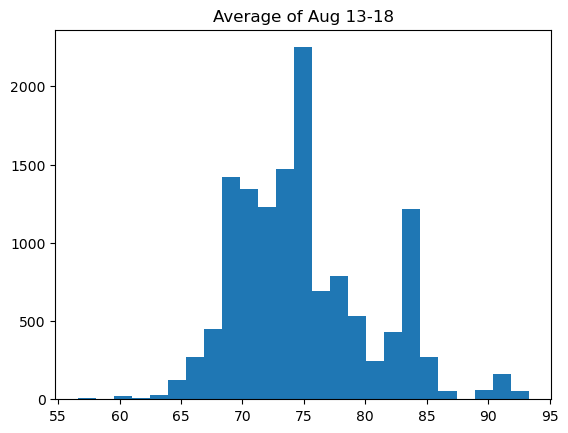

In [75]:
#Average of Aug 13-18 histogram
ax = dataset_train.hist(column='Average of Aug 13-18', bins=25, grid=False)

In [76]:
#creating Average of September 2013-2018 column
my_function('Sum of Sep 13-18', 'Average of Sep-13','Average of Sep-14', 'Average of Sep-15','Average of Sep-16','Average of Sep-17','Average of Sep-18')

In [77]:
dataset_train['Average of Sep 13-18'] = dataset_train['Sum of Sep 13-18']/6
dataset_train['Average of Sep 13-18']

0        73.485000
1        70.656667
2        80.063333
3        73.618333
4        68.706667
           ...    
13168    69.261667
13169    78.928333
13170    76.838333
13171    64.821667
13172    73.618333
Name: Average of Sep 13-18, Length: 13173, dtype: float64

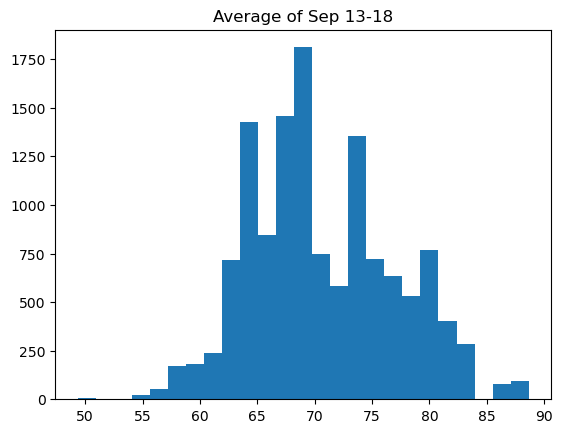

In [78]:
#Average of Sep 13-18 histogram
ax = dataset_train.hist(column='Average of Sep 13-18', bins=25, grid=False)

In [79]:
#creating Average of October 2013-2018 column
my_function('Sum of Oct 13-18', 'Average of Oct-13','Average of Oct-14', 'Average of Oct-15','Average of Oct-16','Average of Oct-17','Average of Oct-18')

In [80]:
dataset_train['Average of Oct 13-18'] = dataset_train['Sum of Oct 13-18']/6
dataset_train['Average of Oct 13-18']

0        61.810000
1        59.381667
2        72.431667
3        70.848333
4        65.426667
           ...    
13168    56.731667
13169    69.075000
13170    72.891667
13171    52.293333
13172    70.848333
Name: Average of Oct 13-18, Length: 13173, dtype: float64

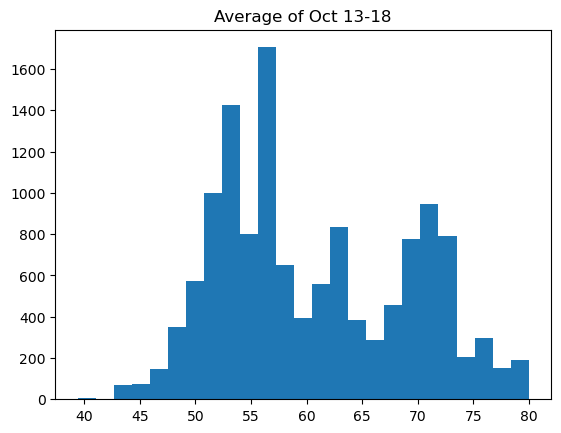

In [81]:
#Average of Oct 13-18 histogram
ax = dataset_train.hist(column='Average of Oct 13-18', bins=25, grid=False)

In [82]:
#creating Average of November 2013-2018 column
my_function('Sum of Nov 13-18', 'Average of Nov-13','Average of Nov-14', 'Average of Nov-15','Average of Nov-16','Average of Nov-17','Average of Nov-18')

In [83]:
dataset_train['Average of Nov 13-18'] = dataset_train['Sum of Nov 13-18']/6
dataset_train['Average of Nov 13-18']

0        47.438333
1        44.625000
2        62.901667
3        66.131667
4        58.836667
           ...    
13168    42.566667
13169    56.381667
13170    66.083333
13171    38.545000
13172    66.131667
Name: Average of Nov 13-18, Length: 13173, dtype: float64

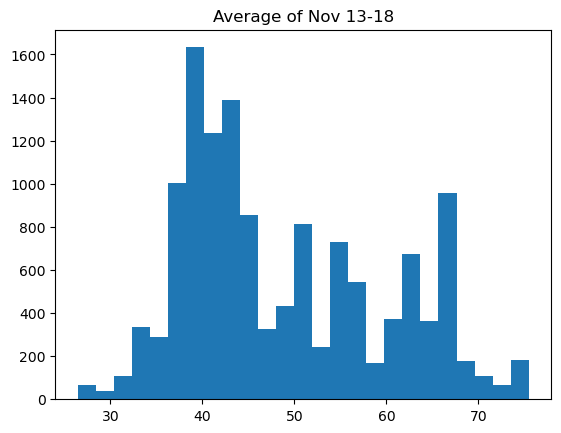

In [84]:
#Average of Nov 13-18 histogram
ax = dataset_train.hist(column='Average of Nov 13-18', bins=25, grid=False)

In [85]:
#creating Average of December 2013-2018 column
my_function('Sum of Dec 13-18', 'Average of Dec-13','Average of Dec-14', 'Average of Dec-15','Average of Dec-16','Average of Dec-17','Average of Dec-18')

In [86]:
dataset_train['Average of Dec 13-18'] = dataset_train['Sum of Dec 13-18']/6
dataset_train['Average of Dec 13-18']

0        41.300000
1        38.028333
2        55.931667
3        60.493333
4        52.928333
           ...    
13168    38.966667
13169    50.460000
13170    60.020000
13171    30.405000
13172    60.493333
Name: Average of Dec 13-18, Length: 13173, dtype: float64

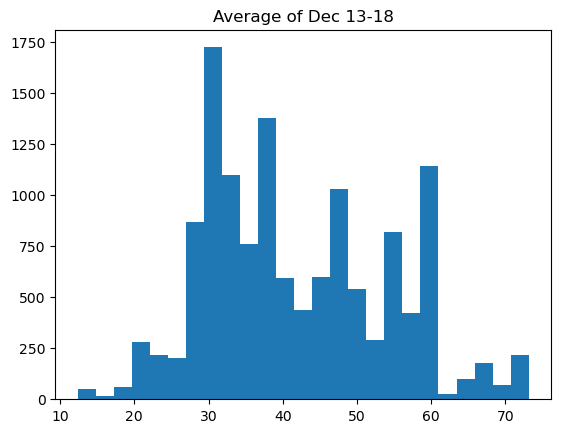

In [87]:
#Average of Dec 13-18 histogram
ax = dataset_train.hist(column='Average of Dec 13-18', bins=25, grid=False)

In [88]:
#saving the newly created columns to a new CSV file
dataset_train.columns.tolist()

['patient_id',
 'patient_race',
 'payer_type',
 'patient_state',
 'patient_zip3',
 'Region',
 'Division',
 'patient_age',
 'patient_gender',
 'bmi',
 'breast_cancer_diagnosis_code',
 'breast_cancer_diagnosis_desc',
 'metastatic_cancer_diagnosis_code',
 'metastatic_first_novel_treatment',
 'metastatic_first_novel_treatment_type',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',


In [89]:
dataset_train.to_csv('dataset_train2.csv', index=False)

In [90]:
dataset_train2 = pd.read_csv("dataset_train2.csv")

## Dropping missing/NA heavy columns and irrelevant columns
This was done in sections to ensure that no columns were dropped accidentally.

In [91]:
dataset_train2.columns.tolist()

['patient_id',
 'patient_race',
 'payer_type',
 'patient_state',
 'patient_zip3',
 'Region',
 'Division',
 'patient_age',
 'patient_gender',
 'bmi',
 'breast_cancer_diagnosis_code',
 'breast_cancer_diagnosis_desc',
 'metastatic_cancer_diagnosis_code',
 'metastatic_first_novel_treatment',
 'metastatic_first_novel_treatment_type',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',


In [92]:
dataset_train2.drop(['patient_race','patient_zip3', 'patient_gender', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'], axis=1, inplace=True)

In [93]:
dataset_train2.to_csv('dataset_train2.csv', index=False)

In [94]:
dataset_train2.columns.tolist()

['patient_id',
 'payer_type',
 'patient_state',
 'Region',
 'Division',
 'patient_age',
 'bmi',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_grad

In [95]:
dataset_train2.drop(['age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',], axis=1, inplace=True)

In [96]:
dataset_train2.to_csv('dataset_train2.csv', index=False)

In [97]:
dataset_train2.columns.tolist()

['patient_id',
 'payer_type',
 'patient_state',
 'Region',
 'Division',
 'patient_age',
 'bmi',
 'population',
 'density',
 'age_median',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',
 'labor_force_participation',
 'unemployment_rate',
 'self

In [98]:
dataset_train2.drop(['divorced','never_married','widowed','family_dual_income','income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over'], axis=1, inplace=True)

In [99]:
dataset_train2.to_csv('dataset_train2.csv', index=False)

In [100]:
dataset_train2.columns.tolist()

['patient_id',
 'payer_type',
 'patient_state',
 'Region',
 'Division',
 'patient_age',
 'bmi',
 'population',
 'density',
 'age_median',
 'male',
 'female',
 'married',
 'family_size',
 'income_household_median',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',
 'labor_force_participation',
 'unemployment_rate',
 'self_employed',
 'farmer',
 'race_white',
 'race_black',
 'race_asian',
 'race_native',
 'race_pacific',
 'race_other',
 'race_multiple',
 'hispanic',
 'disabled',
 'poverty',
 'limited_english',
 'commute_time',
 'health_uninsured',
 'veteran',
 'Average of Jan-13',
 'Average of Feb-13',
 'Average of Mar-13',
 'Average of Apr-13',
 'Average of May-13',
 'Average of Jun-13',
 'Average of Jul-13',
 

In [101]:
dataset_train2.drop(['home_value','rent_median','rent_burden','education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate'], axis=1, inplace=True)

In [102]:
dataset_train2.to_csv('dataset_train2.csv', index=False)

In [103]:
dataset_train2.columns.tolist()

['patient_id',
 'payer_type',
 'patient_state',
 'Region',
 'Division',
 'patient_age',
 'bmi',
 'population',
 'density',
 'age_median',
 'male',
 'female',
 'married',
 'family_size',
 'income_household_median',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'education_college_or_above',
 'education_stem_degree',
 'labor_force_participation',
 'unemployment_rate',
 'self_employed',
 'farmer',
 'race_white',
 'race_black',
 'race_asian',
 'race_native',
 'race_pacific',
 'race_other',
 'race_multiple',
 'hispanic',
 'disabled',
 'poverty',
 'limited_english',
 'commute_time',
 'health_uninsured',
 'veteran',
 'Average of Jan-13',
 'Average of Feb-13',
 'Average of Mar-13',
 'Average of Apr-13',
 'Average of May-13',
 'Average of Jun-13',
 'Average of Jul-13',
 'Average of Aug-13',
 'Average of Sep-13',
 'Average of Oct-13',
 'Average of Nov-13',
 'Average of Dec-13',
 'Average of Jan-14',
 'Average of Feb-14',
 'Average of Mar-14',
 

In [104]:
dataset_train2.drop(['education_stem_degree','labor_force_participation','self_employed','farmer','commute_time'], axis=1, inplace=True)

In [105]:
dataset_train2.to_csv('dataset_train2.csv', index=False)

In [106]:
dataset_train2.columns.tolist()

['patient_id',
 'payer_type',
 'patient_state',
 'Region',
 'Division',
 'patient_age',
 'bmi',
 'population',
 'density',
 'age_median',
 'male',
 'female',
 'married',
 'family_size',
 'income_household_median',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'education_college_or_above',
 'unemployment_rate',
 'race_white',
 'race_black',
 'race_asian',
 'race_native',
 'race_pacific',
 'race_other',
 'race_multiple',
 'hispanic',
 'disabled',
 'poverty',
 'limited_english',
 'health_uninsured',
 'veteran',
 'Average of Jan-13',
 'Average of Feb-13',
 'Average of Mar-13',
 'Average of Apr-13',
 'Average of May-13',
 'Average of Jun-13',
 'Average of Jul-13',
 'Average of Aug-13',
 'Average of Sep-13',
 'Average of Oct-13',
 'Average of Nov-13',
 'Average of Dec-13',
 'Average of Jan-14',
 'Average of Feb-14',
 'Average of Mar-14',
 'Average of Apr-14',
 'Average of May-14',
 'Average of Jun-14',
 'Average of Jul-14',
 'Average of Au

In [107]:
dataset_train2.drop(['Average of Jan-13',
 'Average of Feb-13',
 'Average of Mar-13',
 'Average of Apr-13',
 'Average of May-13',
 'Average of Jun-13',
 'Average of Jul-13',
 'Average of Aug-13',
 'Average of Sep-13',
 'Average of Oct-13',
 'Average of Nov-13',
 'Average of Dec-13',
 'Average of Jan-14',
 'Average of Feb-14',
 'Average of Mar-14',
 'Average of Apr-14',
 'Average of May-14',
 'Average of Jun-14',
 'Average of Jul-14',
 'Average of Aug-14',
 'Average of Sep-14',
 'Average of Oct-14',
 'Average of Nov-14',
 'Average of Dec-14',
 'Average of Jan-15',
 'Average of Feb-15',
 'Average of Mar-15',
 'Average of Apr-15',
 'Average of May-15',
 'Average of Jun-15',
 'Average of Jul-15',
 'Average of Aug-15',
 'Average of Sep-15',
 'Average of Oct-15',
 'Average of Nov-15',
 'Average of Dec-15',
 'Average of Jan-16',
 'Average of Feb-16',
 'Average of Mar-16',
 'Average of Apr-16',
 'Average of May-16',
 'Average of Jun-16',
 'Average of Jul-16',
 'Average of Aug-16',
 'Average of Sep-16',
 'Average of Oct-16',
 'Average of Nov-16',
 'Average of Dec-16',
 'Average of Jan-17',
 'Average of Feb-17',
 'Average of Mar-17',
 'Average of Apr-17',
 'Average of May-17',
 'Average of Jun-17',
 'Average of Jul-17',
 'Average of Aug-17',
 'Average of Sep-17',
 'Average of Oct-17',
 'Average of Nov-17',
 'Average of Dec-17',
 'Average of Jan-18',
 'Average of Feb-18',
 'Average of Mar-18',
 'Average of Apr-18',
 'Average of May-18',
 'Average of Jun-18',
 'Average of Jul-18',
 'Average of Aug-18',
 'Average of Sep-18',
 'Average of Oct-18',
 'Average of Nov-18',
 'Average of Dec-18',], axis=1, inplace=True)

In [108]:
dataset_train2.to_csv('dataset_train2.csv', index=False)

In [109]:
dataset_train2.columns.tolist()

['patient_id',
 'payer_type',
 'patient_state',
 'Region',
 'Division',
 'patient_age',
 'bmi',
 'population',
 'density',
 'age_median',
 'male',
 'female',
 'married',
 'family_size',
 'income_household_median',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'education_college_or_above',
 'unemployment_rate',
 'race_white',
 'race_black',
 'race_asian',
 'race_native',
 'race_pacific',
 'race_other',
 'race_multiple',
 'hispanic',
 'disabled',
 'poverty',
 'limited_english',
 'health_uninsured',
 'veteran',
 'metastatic_diagnosis_period',
 'Sum of Jan 13-18',
 'Average of Jan 13-18',
 'Sum of Feb 13-18',
 'Average of Feb 13-18',
 'Sum of Mar 13-18',
 'Average of Mar 13-18',
 'Sum of Apr 13-18',
 'Average of Apr 13-18',
 'Sum of May 13-18',
 'Average of May 13-18',
 'Sum of Jun 13-18',
 'Average of Jun 13-18',
 'Sum of Jul 13-18',
 'Average of Jul 13-18',
 'Sum of Aug 13-18',
 'Average of Aug 13-18',
 'Sum of Sep 13-18',
 'Average of

In [110]:
dataset_train2.drop([ 'Sum of Jan 13-18', 'Sum of Feb 13-18',  'Sum of Mar 13-18',  'Sum of Apr 13-18', 'Sum of May 13-18',  'Sum of Jun 13-18',  'Sum of Jul 13-18', 'Sum of Aug 13-18',  'Sum of Sep 13-18', 'Sum of Oct 13-18', 'Sum of Nov 13-18', 'Sum of Dec 13-18',], axis=1, inplace=True)

In [111]:
dataset_train2.to_csv('dataset_train2.csv', index=False)

In [112]:
dataset_train2.columns.tolist()

['patient_id',
 'payer_type',
 'patient_state',
 'Region',
 'Division',
 'patient_age',
 'bmi',
 'population',
 'density',
 'age_median',
 'male',
 'female',
 'married',
 'family_size',
 'income_household_median',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'education_college_or_above',
 'unemployment_rate',
 'race_white',
 'race_black',
 'race_asian',
 'race_native',
 'race_pacific',
 'race_other',
 'race_multiple',
 'hispanic',
 'disabled',
 'poverty',
 'limited_english',
 'health_uninsured',
 'veteran',
 'metastatic_diagnosis_period',
 'Average of Jan 13-18',
 'Average of Feb 13-18',
 'Average of Mar 13-18',
 'Average of Apr 13-18',
 'Average of May 13-18',
 'Average of Jun 13-18',
 'Average of Jul 13-18',
 'Average of Aug 13-18',
 'Average of Sep 13-18',
 'Average of Oct 13-18',
 'Average of Nov 13-18',
 'Average of Dec 13-18']

In [113]:
dataset_train2.head()

,patient_id,payer_type,patient_state,Region,Division,patient_age,bmi,population,density,age_median,...,Average of Mar 13-18,Average of Apr 13-18,Average of May 13-18,Average of Jun 13-18,Average of Jul 13-18,Average of Aug 13-18,Average of Sep 13-18,Average of Oct 13-18,Average of Nov 13-18,Average of Dec 13-18
0,268700,COMMERCIAL,AR,South,West South Central,39,NaN,3924.87,82.63,42.58,...,47.718333,58.473333,68.196667,78.018333,79.361667,77.716667,73.485000,61.810000,47.438333,41.300000
1,484983,NaN,IL,Midwest,East North Central,55,35.36,2745.39,51.79,43.54,...,44.593333,56.410000,66.986667,75.738333,76.831667,75.436667,70.656667,59.381667,44.625000,38.028333
2,277055,COMMERCIAL,CA,West,Pacific,59,NaN,38343.18,700.34,36.28,...,64.610000,67.873333,71.105000,80.021667,84.558333,84.170000,80.063333,72.431667,62.901667,55.931667
3,320055,MEDICAID,CA,West,Pacific,59,NaN,36054.12,5294.33,36.65,...,62.778333,64.126667,64.831667,68.896667,73.175000,73.851667,73.618333,70.848333,66.131667,60.493333
4,190386,COMMERCIAL,CA,West,Pacific,71,NaN,13700.37,400.48,41.78,...,59.058333,60.433333,61.728333,66.588333,69.238333,68.895000,68.706667,65.426667,58.836667,52.928333


## Replacing NA values in 'payer_type' column and 'bmi' column with explanation
The NA values in the 'payer_type' column will be handled as 'NONE' due to the chosen interpretation that any NAs mean that the patient does not have health insurance. The NA values in the 'bmi' column will be left as is to avoid any potential bias. 

In [114]:
dataset_train2['payer_type']=dataset_train2['payer_type'].fillna('NONE')

In [115]:
dataset_train2['payer_type']

0        COMMERCIAL
1              NONE
2        COMMERCIAL
3          MEDICAID
4        COMMERCIAL
            ...    
13168      MEDICAID
13169    COMMERCIAL
13170    COMMERCIAL
13171    COMMERCIAL
13172      MEDICAID
Name: payer_type, Length: 13173, dtype: object

In [116]:
dataset_train2.to_csv('dataset_train2.csv', index=False)

In [117]:
dataset_train2.head()

,patient_id,payer_type,patient_state,Region,Division,patient_age,bmi,population,density,age_median,...,Average of Mar 13-18,Average of Apr 13-18,Average of May 13-18,Average of Jun 13-18,Average of Jul 13-18,Average of Aug 13-18,Average of Sep 13-18,Average of Oct 13-18,Average of Nov 13-18,Average of Dec 13-18
0,268700,COMMERCIAL,AR,South,West South Central,39,NaN,3924.87,82.63,42.58,...,47.718333,58.473333,68.196667,78.018333,79.361667,77.716667,73.485000,61.810000,47.438333,41.300000
1,484983,NONE,IL,Midwest,East North Central,55,35.36,2745.39,51.79,43.54,...,44.593333,56.410000,66.986667,75.738333,76.831667,75.436667,70.656667,59.381667,44.625000,38.028333
2,277055,COMMERCIAL,CA,West,Pacific,59,NaN,38343.18,700.34,36.28,...,64.610000,67.873333,71.105000,80.021667,84.558333,84.170000,80.063333,72.431667,62.901667,55.931667
3,320055,MEDICAID,CA,West,Pacific,59,NaN,36054.12,5294.33,36.65,...,62.778333,64.126667,64.831667,68.896667,73.175000,73.851667,73.618333,70.848333,66.131667,60.493333
4,190386,COMMERCIAL,CA,West,Pacific,71,NaN,13700.37,400.48,41.78,...,59.058333,60.433333,61.728333,66.588333,69.238333,68.895000,68.706667,65.426667,58.836667,52.928333


## Train-test split for evaluating different models
Linear regression, decision tree regressor, random forest regressor, support vector regressor (SVR), gradient boosting regressor, and histogram-based gradient boosting regressor are all tested and evaluated using mean squared error (MSE), mean absolute error (MAE), and r-squared (R^2). The root mean squared error (RMSE) is then calculated using the MAE for each model.

In [118]:
y = dataset_train2['metastatic_diagnosis_period']

In [119]:
X = dataset_train2.drop('metastatic_diagnosis_period', axis=1)

In [120]:
X = X.fillna(X.mean())
X=pd.get_dummies(X, drop_first=True)

/var/folders/rn/m5yfn6fx4hs6k7xz1t6czh_00000gn/T/ipykernel_65968/2276110171.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X = X.fillna(X.mean())


In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [122]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape: (10538, 98)
X_test shape: (2635, 98)
y_train shape (10538,)
y_test shape (2635,)


In [123]:
model_1 = LinearRegression()

In [124]:
model_1.fit(X_train, y_train)

LinearRegression()

In [125]:
y_pred = model_1.predict(X_test)

In [126]:
mae = mean_absolute_error(y_test, y_pred)

In [127]:
mae

93.47826503171771

In [128]:
mse = mean_squared_error(y_test, y_pred)

In [129]:
mse

11985.754499254825

In [130]:
r2 = r2_score(y_test, y_pred)

In [131]:
r2

0.01320196477073532

In [132]:
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 109.4794706748933


In [133]:
model_2 = DecisionTreeRegressor()

In [134]:
model_2.fit(X_train, y_train)

DecisionTreeRegressor()

In [135]:
y_pred = model_2.predict(X_test)

In [136]:
mae = mean_absolute_error(y_test, y_pred)
mae

111.20189753320683

In [137]:
mse = mean_squared_error(y_test, y_pred)
mse

22558.854269449716

In [138]:
r2 = r2_score(y_test, y_pred)
r2

-0.8572909257819603

In [139]:
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 150.19605277586265


In [140]:
model_3 = RandomForestRegressor()
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

91.07203415559772

In [141]:
mse = mean_squared_error(y_test, y_pred)
mse

12198.623903187854

In [142]:
r2 = r2_score(y_test, y_pred)
r2

-0.004323766260598605

In [143]:
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 110.44738069862886


In [144]:
model_4 = SVR()
model_4.fit(X_train, y_train)
y_pred = model_4.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

87.44918483995167

In [145]:
mse = mean_squared_error(y_test, y_pred)
mse

15338.558353559121

In [146]:
r2 = r2_score(y_test, y_pred)
r2

-0.26283741649160275

In [147]:
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 123.84893359879656


In [148]:
model_5 = GradientBoostingRegressor()
model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

90.09324038307221

In [149]:
mse = mean_squared_error(y_test, y_pred)
mse

11363.342308144951

In [150]:
r2 = r2_score(y_test, y_pred)
r2

0.06444572479670196

In [151]:
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 106.59897892637129


In [152]:
model_6 = HistGradientBoostingRegressor()
model_6.fit(X_train, y_train)
y_pred = model_6.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

90.23499328944482

In [153]:
mse = mean_squared_error(y_test, y_pred)
mse

11445.221628740484

In [154]:
r2 = r2_score(y_test, y_pred)
r2

0.057704526093307784

In [155]:
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 106.98234260260188


## Applying data cleaning/processing steps to the test data

In [156]:
dataset_test.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.00,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
2,571362,NaN,COMMERCIAL,TX,794,South,West South Central,54,F,32.33,...,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13
3,907331,NaN,COMMERCIAL,TN,373,South,East South Central,63,F,27.07,...,47.57,53.50,71.31,75.20,76.96,75.78,74.87,61.06,44.31,42.83
4,208382,Asian,NaN,WA,980,West,Pacific,62,F,NaN,...,41.02,46.25,56.92,57.88,66.16,65.21,57.52,49.53,43.75,38.33


## Creating new temperature columns

In [157]:
def my_function(sumofyears,average13,average14,average15,average16,average17,average18):
    dataset_test[sumofyears] = dataset_test[average13] + dataset_test[average14] + dataset_test[average15]+dataset_test[average16]+dataset_test[average17]+ dataset_test[average18]    

In [158]:
my_function('Sum of Jan 13-18', 'Average of Jan-13','Average of Jan-14', 'Average of Jan-15','Average of Jan-16','Average of Jan-17','Average of Jan-18')

dataset_test['Average of Jan 13-18'] = dataset_test['Sum of Jan 13-18']/6
dataset_test['Average of Jan 13-18']

my_function('Sum of Feb 13-18', 'Average of Feb-13','Average of Feb-14', 'Average of Feb-15','Average of Feb-16','Average of Feb-17','Average of Feb-18')

dataset_test['Average of Feb 13-18'] = dataset_test['Sum of Feb 13-18']/6
dataset_test['Average of Feb 13-18']

my_function('Sum of Mar 13-18', 'Average of Mar-13','Average of Mar-14', 'Average of Mar-15','Average of Mar-16','Average of Mar-17','Average of Mar-18')

dataset_test['Average of Mar 13-18'] = dataset_test['Sum of Mar 13-18']/6
dataset_test['Average of Mar 13-18']

my_function('Sum of Apr 13-18', 'Average of Apr-13','Average of Apr-14', 'Average of Apr-15','Average of Apr-16','Average of Apr-17','Average of Apr-18')

dataset_test['Average of Apr 13-18'] = dataset_test['Sum of Apr 13-18']/6
dataset_test['Average of Apr 13-18']

my_function('Sum of May 13-18', 'Average of May-13','Average of May-14', 'Average of May-15','Average of May-16','Average of May-17','Average of May-18')

dataset_test['Average of May 13-18'] = dataset_test['Sum of May 13-18']/6
dataset_test['Average of May 13-18']

my_function('Sum of Jun 13-18', 'Average of Jun-13','Average of Jun-14', 'Average of Jun-15','Average of Jun-16','Average of Jun-17','Average of Jun-18')

dataset_test['Average of Jun 13-18'] = dataset_test['Sum of Jun 13-18']/6
dataset_test['Average of Jun 13-18']

my_function('Sum of Jul 13-18', 'Average of Jul-13','Average of Jul-14', 'Average of Jul-15','Average of Jul-16','Average of Jul-17','Average of Jul-18')

dataset_test['Average of Jul 13-18'] = dataset_test['Sum of Jul 13-18']/6
dataset_test['Average of Jul 13-18']

my_function('Sum of Aug 13-18', 'Average of Aug-13','Average of Aug-14', 'Average of Aug-15','Average of Aug-16','Average of Aug-17','Average of Aug-18')

dataset_test['Average of Aug 13-18'] = dataset_test['Sum of Aug 13-18']/6
dataset_test['Average of Aug 13-18']

my_function('Sum of Sep 13-18', 'Average of Sep-13','Average of Sep-14', 'Average of Sep-15','Average of Sep-16','Average of Sep-17','Average of Sep-18')

dataset_test['Average of Sep 13-18'] = dataset_test['Sum of Sep 13-18']/6
dataset_test['Average of Sep 13-18']

my_function('Sum of Oct 13-18', 'Average of Oct-13','Average of Oct-14', 'Average of Oct-15','Average of Oct-16','Average of Oct-17','Average of Oct-18')

dataset_test['Average of Oct 13-18'] = dataset_test['Sum of Oct 13-18']/6
dataset_test['Average of Oct 13-18']

my_function('Sum of Nov 13-18', 'Average of Nov-13','Average of Nov-14', 'Average of Nov-15','Average of Nov-16','Average of Nov-17','Average of Nov-18')

dataset_test['Average of Nov 13-18'] = dataset_test['Sum of Nov 13-18']/6
dataset_test['Average of Nov 13-18']

my_function('Sum of Dec 13-18', 'Average of Dec-13','Average of Dec-14', 'Average of Dec-15','Average of Dec-16','Average of Dec-17','Average of Dec-18')

dataset_test['Average of Dec 13-18'] = dataset_test['Sum of Dec 13-18']/6
dataset_test['Average of Dec 13-18']

0       52.206667
1       48.251667
2       43.313333
3       43.456667
4       36.296667
          ...    
5641    31.560000
5642    46.656667
5643    59.793333
5644    60.495000
5645    29.630000
Name: Average of Dec 13-18, Length: 5646, dtype: float64

In [159]:
#saving newly created columns to a new CSV file
dataset_test.to_csv('dataset_test2.csv', index=False)

In [160]:
dataset_test2 = pd.read_csv("dataset_test2.csv")

In [161]:
dataset_test2.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Sum of Aug 13-18,Average of Aug 13-18,Sum of Sep 13-18,Average of Sep 13-18,Sum of Oct 13-18,Average of Oct 13-18,Sum of Nov 13-18,Average of Nov 13-18,Sum of Dec 13-18,Average of Dec 13-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,...,495.90,82.650000,474.66,79.110000,417.31,69.551667,345.50,57.583333,313.24,52.206667
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.00,...,478.00,79.666667,453.94,75.656667,382.76,63.793333,312.75,52.125000,289.51,48.251667
2,571362,NaN,COMMERCIAL,TX,794,South,West South Central,54,F,32.33,...,477.79,79.631667,441.47,73.578333,383.23,63.871667,308.44,51.406667,259.88,43.313333
3,907331,NaN,COMMERCIAL,TN,373,South,East South Central,63,F,27.07,...,452.85,75.475000,429.42,71.570000,365.27,60.878333,288.31,48.051667,260.74,43.456667
4,208382,Asian,NaN,WA,980,West,Pacific,62,F,NaN,...,391.64,65.273333,349.35,58.225000,303.72,50.620000,254.71,42.451667,217.78,36.296667


## Dropping columns

In [162]:
dataset_test2.columns.tolist()

dataset_test2.drop(['patient_race','patient_zip3', 'patient_gender', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'], axis=1, inplace=True)

dataset_test2.to_csv('dataset_test2.csv', index=False)

dataset_test2.columns.tolist()

dataset_test2.drop(['age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',], axis=1, inplace=True)

dataset_test2.to_csv('dataset_test2.csv', index=False)

dataset_test2.columns.tolist()

dataset_test2.drop(['divorced','never_married','widowed','family_dual_income','income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over'], axis=1, inplace=True)

dataset_test2.to_csv('dataset_test2.csv', index=False)

dataset_test2.columns.tolist()

dataset_test2.drop(['home_value','rent_median','rent_burden','education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate'], axis=1, inplace=True)

dataset_test2.to_csv('dataset_test2.csv', index=False)

dataset_test2.columns.tolist()

dataset_test2.drop(['education_stem_degree','labor_force_participation','self_employed','farmer','commute_time'], axis=1, inplace=True)

dataset_test2.to_csv('dataset_test2.csv', index=False)

dataset_test2.columns.tolist()

dataset_test2.drop(['Average of Jan-13',
 'Average of Feb-13',
 'Average of Mar-13',
 'Average of Apr-13',
 'Average of May-13',
 'Average of Jun-13',
 'Average of Jul-13',
 'Average of Aug-13',
 'Average of Sep-13',
 'Average of Oct-13',
 'Average of Nov-13',
 'Average of Dec-13',
 'Average of Jan-14',
 'Average of Feb-14',
 'Average of Mar-14',
 'Average of Apr-14',
 'Average of May-14',
 'Average of Jun-14',
 'Average of Jul-14',
 'Average of Aug-14',
 'Average of Sep-14',
 'Average of Oct-14',
 'Average of Nov-14',
 'Average of Dec-14',
 'Average of Jan-15',
 'Average of Feb-15',
 'Average of Mar-15',
 'Average of Apr-15',
 'Average of May-15',
 'Average of Jun-15',
 'Average of Jul-15',
 'Average of Aug-15',
 'Average of Sep-15',
 'Average of Oct-15',
 'Average of Nov-15',
 'Average of Dec-15',
 'Average of Jan-16',
 'Average of Feb-16',
 'Average of Mar-16',
 'Average of Apr-16',
 'Average of May-16',
 'Average of Jun-16',
 'Average of Jul-16',
 'Average of Aug-16',
 'Average of Sep-16',
 'Average of Oct-16',
 'Average of Nov-16',
 'Average of Dec-16',
 'Average of Jan-17',
 'Average of Feb-17',
 'Average of Mar-17',
 'Average of Apr-17',
 'Average of May-17',
 'Average of Jun-17',
 'Average of Jul-17',
 'Average of Aug-17',
 'Average of Sep-17',
 'Average of Oct-17',
 'Average of Nov-17',
 'Average of Dec-17',
 'Average of Jan-18',
 'Average of Feb-18',
 'Average of Mar-18',
 'Average of Apr-18',
 'Average of May-18',
 'Average of Jun-18',
 'Average of Jul-18',
 'Average of Aug-18',
 'Average of Sep-18',
 'Average of Oct-18',
 'Average of Nov-18',
 'Average of Dec-18',], axis=1, inplace=True)

dataset_test2.to_csv('dataset_test2.csv', index=False)

dataset_test2.columns.tolist()

dataset_test2.drop([ 'Sum of Jan 13-18', 'Sum of Feb 13-18',  'Sum of Mar 13-18',  'Sum of Apr 13-18', 'Sum of May 13-18',  'Sum of Jun 13-18',  'Sum of Jul 13-18', 'Sum of Aug 13-18',  'Sum of Sep 13-18', 'Sum of Oct 13-18', 'Sum of Nov 13-18', 'Sum of Dec 13-18',], axis=1, inplace=True)

dataset_test2.to_csv('dataset_test2.csv', index=False)

dataset_test2.columns.tolist()

dataset_test2.head()

,patient_id,payer_type,patient_state,Region,Division,patient_age,bmi,population,density,age_median,...,Average of Mar 13-18,Average of Apr 13-18,Average of May 13-18,Average of Jun 13-18,Average of Jul 13-18,Average of Aug 13-18,Average of Sep 13-18,Average of Oct 13-18,Average of Nov 13-18,Average of Dec 13-18
0,730681,COMMERCIAL,LA,South,West South Central,55,NaN,4639.07,72.66,41.50,...,59.566667,67.113333,73.666667,80.455000,83.038333,82.650000,79.110000,69.551667,57.583333,52.206667
1,334212,NaN,NC,South,South Atlantic,60,40.00,10875.30,217.91,39.64,...,51.373333,62.328333,71.628333,78.636667,81.061667,79.666667,75.656667,63.793333,52.125000,48.251667
2,571362,COMMERCIAL,TX,South,West South Central,54,32.33,18716.73,1019.51,30.37,...,56.010000,61.848333,70.583333,79.495000,81.463333,79.631667,73.578333,63.871667,51.406667,43.313333
3,907331,COMMERCIAL,TN,South,East South Central,63,27.07,7804.79,140.05,44.32,...,48.431667,58.625000,67.013333,74.506667,76.373333,75.475000,71.570000,60.878333,48.051667,43.456667
4,208382,NaN,WA,West,Pacific,62,NaN,28628.29,1091.83,39.68,...,43.456667,47.836667,55.488333,59.628333,64.638333,65.273333,58.225000,50.620000,42.451667,36.296667


## Handling NA values

In [163]:
dataset_test2['payer_type']=dataset_test2['payer_type'].fillna('NONE')

dataset_test2['payer_type']

dataset_test2.to_csv('dataset_test2.csv', index=False)

dataset_test2.head()

,patient_id,payer_type,patient_state,Region,Division,patient_age,bmi,population,density,age_median,...,Average of Mar 13-18,Average of Apr 13-18,Average of May 13-18,Average of Jun 13-18,Average of Jul 13-18,Average of Aug 13-18,Average of Sep 13-18,Average of Oct 13-18,Average of Nov 13-18,Average of Dec 13-18
0,730681,COMMERCIAL,LA,South,West South Central,55,NaN,4639.07,72.66,41.50,...,59.566667,67.113333,73.666667,80.455000,83.038333,82.650000,79.110000,69.551667,57.583333,52.206667
1,334212,NONE,NC,South,South Atlantic,60,40.00,10875.30,217.91,39.64,...,51.373333,62.328333,71.628333,78.636667,81.061667,79.666667,75.656667,63.793333,52.125000,48.251667
2,571362,COMMERCIAL,TX,South,West South Central,54,32.33,18716.73,1019.51,30.37,...,56.010000,61.848333,70.583333,79.495000,81.463333,79.631667,73.578333,63.871667,51.406667,43.313333
3,907331,COMMERCIAL,TN,South,East South Central,63,27.07,7804.79,140.05,44.32,...,48.431667,58.625000,67.013333,74.506667,76.373333,75.475000,71.570000,60.878333,48.051667,43.456667
4,208382,NONE,WA,West,Pacific,62,NaN,28628.29,1091.83,39.68,...,43.456667,47.836667,55.488333,59.628333,64.638333,65.273333,58.225000,50.620000,42.451667,36.296667


## Converting 'object' (categorical) columns to numeric in the test data and the training data

In [164]:
cat_columns = dataset_test2.select_dtypes(['object']).columns
cat_columns

Index(['payer_type', 'patient_state', 'Region', 'Division'], dtype='object')

In [165]:
dataset_test2['payer_type'] = pd.to_numeric(dataset_test2['payer_type'],errors = 'coerce')
dataset_test2['patient_state'] = pd.to_numeric(dataset_test2['patient_state'],errors = 'coerce')
dataset_test2['Region'] = pd.to_numeric(dataset_test2['Region'],errors = 'coerce')
dataset_test2['Division'] = pd.to_numeric(dataset_test2['Division'],errors = 'coerce')


print(dataset_test2.info())

cat_columns = dataset_train2.select_dtypes(['object']).columns
cat_columns
dataset_train2['payer_type'] = pd.to_numeric(dataset_train2['payer_type'],errors = 'coerce')
dataset_train2['patient_state'] = pd.to_numeric(dataset_train2['patient_state'],errors = 'coerce')
dataset_train2['Region'] = pd.to_numeric(dataset_train2['Region'],errors = 'coerce')
dataset_train2['Division'] = pd.to_numeric(dataset_train2['Division'],errors = 'coerce')


print(dataset_train2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5646 entries, 0 to 5645
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_id                   5646 non-null   int64  
 1   payer_type                   0 non-null      float64
 2   patient_state                0 non-null      float64
 3   Region                       0 non-null      float64
 4   Division                     0 non-null      float64
 5   patient_age                  5646 non-null   int64  
 6   bmi                          1705 non-null   float64
 7   population                   5646 non-null   float64
 8   density                      5646 non-null   float64
 9   age_median                   5646 non-null   float64
 10  male                         5646 non-null   float64
 11  female                       5646 non-null   float64
 12  married                      5646 non-null   float64
 13  family_size       

In [166]:
#saving converted column types to the respective CSV files
dataset_test2.to_csv('dataset_test2.csv', index=False)
dataset_train2.to_csv('dataset_test2.csv', index=False)

## Fitting the model with prediction data

In [167]:
y = dataset_train2['metastatic_diagnosis_period']

X = dataset_test2

In [168]:
train = dataset_train2
fitdata = dataset_train2.drop('metastatic_diagnosis_period', axis=1)
test = dataset_test2

model = HistGradientBoostingRegressor()

target = train['metastatic_diagnosis_period']

model.fit(fitdata, target)

test_predictions = model.predict(test)
test_predictions

array([130.97420724,  92.06576012, 108.25630032, ...,  77.2167471 ,
       104.49343471,  95.62334843])

In [169]:
#creating a DataFrame that will store the test predictions with the appropriate patient_id values
output_df = pd.DataFrame({ 
    'patient_id': dataset_test2['patient_id'],
    'metastatic_diagnosis_period': test_predictions
})

#saving the DataFrame to a CSV file
output_df.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv")

Predictions saved to submission.csv
